# Preparation

In [2]:
%pip install scipy
%pip install mediapipe
%pip install opencv-python
%pip install jupyter
%pip install pandas
%pip install numpy
%pip install matplotlib


import os
import glob
import pandas as pd
import numpy as np

import scipy
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import glob
import pandas as pd
import numpy as np

curfolder = os.getcwd()
print(curfolder)

mtfolder = curfolder + '/Output_TimeSeries/'
print(mtfolder)

processedfolder = curfolder + '/TS_processed/'
vidfolder = curfolder + '/Output_Videos/'

# get all the files in the folder
mtfiles = glob.glob(mtfolder + '*body.csv')
print(mtfiles)

vidfiles = glob.glob(vidfolder + '*.mp4')
print(vidfiles)

/Users/gillianrosenberg/Desktop/ZAS/FLESH_IteratedLearning
/Users/gillianrosenberg/Desktop/ZAS/FLESH_IteratedLearning/Output_TimeSeries/
['/Users/gillianrosenberg/Desktop/ZAS/FLESH_IteratedLearning/Output_TimeSeries/kalt_g_ch3_g4_compr_clean_body.csv', '/Users/gillianrosenberg/Desktop/ZAS/FLESH_IteratedLearning/Output_TimeSeries/leise_g_ch2_g1_compr_clean_body.csv', '/Users/gillianrosenberg/Desktop/ZAS/FLESH_IteratedLearning/Output_TimeSeries/Donner_g_ch3_g8_compr_clean_body.csv', '/Users/gillianrosenberg/Desktop/ZAS/FLESH_IteratedLearning/Output_TimeSeries/kalt_g_ch2_g18_compr_clean_body.csv', '/Users/gillianrosenberg/Desktop/ZAS/FLESH_IteratedLearning/Output_TimeSeries/kalt_g_ch1_g15_compr_clean_body.csv', '/Users/gillianrosenberg/Desktop/ZAS/FLESH_IteratedLearning/Output_TimeSeries/rennen_g_ch2_g19_compr_clean_body.csv', '/Users/gillianrosenberg/Desktop/ZAS/FLESH_IteratedLearning/Output_TimeSeries/rennen_g_ch1_g14_compr_clean_body.csv', '/Users/gillianrosenberg/Desktop/ZAS/FLESH_Ite

# Clean the data

In [4]:
file = mtfiles[0]
# get the last part of the path in sample
def clean_data(file):
    sample = pd.read_csv(file)
    sample
    fileID = os.path.basename(file)
    print(fileID)

# replace _body.csv with ''
    fileID = fileID.replace('_body.csv', '')
    print(fileID)

# add fileID column to the sample
    sample['fileID'] = fileID

# in the sample, get rid of all columns that contain visibility
    visibility_columns = [col for col in sample.columns if 'visibility' in col]

# get rid of all columns that contain visibility
    sample = sample.drop(visibility_columns, axis=1)
    return sample

sample = clean_data(file)

kalt_g_ch3_g4_compr_clean_body.csv
kalt_g_ch3_g4_compr_clean


# Flip the Y axis vertical data

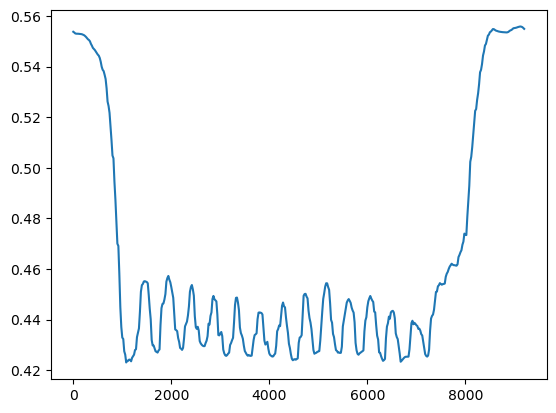

/var/folders/_w/lg28lz4167jg30x0sng46nx40000gn/T/ipykernel_1123/3804785974.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[joint][frame] = ytrans
/var/folders/_w/lg28lz4167jg30x0sng46nx40000gn/T/ipykernel_1123/3804785974.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[joint][frame] = ytrans
/var/folders/_w/lg28lz4167jg30x0sng46nx40000gn/T/ipykernel_1123/3804785974.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[

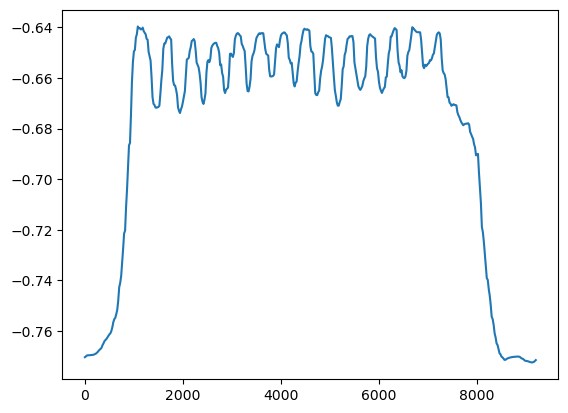

In [5]:
# plot left wrist, vertical (pre flipping)

import matplotlib.pyplot as plt

plt.plot(sample['time'], sample['Y_LEFT_WRIST'])
plt.show()

# flip the y-axis data (code modified from envisionbox)
def flip_data(df):
    cols = df.columns
    cols  = [col for col in df.columns if 'Y_' in col]
    cols = list(cols)
        # first get the vertical height of the configuration
        # we only do this for the first frame; the transformation will be applied to all frames
    maxpoint = []
    for joint in cols:
        maxpoint.append(df[joint][0])
        # iterate over each joint, in each frame, to flip the y-axis
    for frame in range(len(df)):
        for joint in cols:
            ytrans = max(maxpoint) - df[joint][frame] - 1
            df[joint][frame] = ytrans
 
    return df

sample = flip_data(sample)

# plot left wrist, vertical (post flipping)

plt.plot(sample['time'], sample['Y_LEFT_WRIST'])
plt.show()

# Interpolate the data

In [116]:
# play the video

from IPython.display import Video
import cv2

# in vidfiles find video that has the same fileID as the sample
video = [vid for vid in vidfiles if fileID in vid][0]
print(video)

# play with cv2
import cv2

cap = cv2.VideoCapture(video)

while(cap.isOpened()):
    ret, frame = cap.read()

    if ret == True:

        cv2.imshow('Frame', frame)

        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

    else:
        break

IndexError: list index out of range

In [6]:
# obtain column names
def interpolate(sample):
    cols = sample.columns
    print(cols)

# put away time and fileID from cols
    cols = cols.drop(['time', 'fileID'])

# loop over the cols and interpolate missing data
    for col in cols:
        sample[col] = sample[col].interpolate(method='linear', x = sample['time'], limit=10)
    return cols, sample

cols, sample = interpolate(sample)

Index(['time', 'X_NOSE', 'Y_NOSE', 'Z_NOSE', 'X_LEFT_EYE_INNER',
       'Y_LEFT_EYE_INNER', 'Z_LEFT_EYE_INNER', 'X_LEFT_EYE', 'Y_LEFT_EYE',
       'Z_LEFT_EYE',
       ...
       'X_RIGHT_HEEL', 'Y_RIGHT_HEEL', 'Z_RIGHT_HEEL', 'X_LEFT_FOOT_INDEX',
       'Y_LEFT_FOOT_INDEX', 'Z_LEFT_FOOT_INDEX', 'X_RIGHT_FOOT_INDEX',
       'Y_RIGHT_FOOT_INDEX', 'Z_RIGHT_FOOT_INDEX', 'fileID'],
      dtype='object', length=101)


# Smooth the data

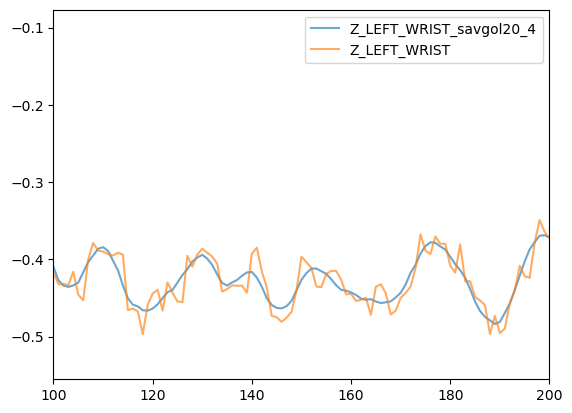

In [7]:
# test the different smoothing filter options - smoothing with savitzky-golay filter

import scipy
import matplotlib.pyplot as plt
x = 'X_LEFT_WRIST'
z = 'Z_LEFT_WRIST'
y = 'Y_LEFT_WRIST'


# list possible window
window = [20]
# list possible orders
order = [4]

# col of interest
samplecol = [y, z, x]

# iterate over handcols and apply all possible combinations of window and order, save it to new df
# prepare new df
df_smooth = pd.DataFrame()

for col in samplecol:
    for win in window:
        for ord in order:
            df_smooth[col + '_savgol' + str(win) + '_' + str(ord)] = scipy.signal.savgol_filter(sample[col], win, ord)


# make R_Hand_x from df_sample a list
LKnee_x = sample[x].tolist()
LKnee_y = sample[y].tolist()
LKnee_z = sample[z].tolist()


# load these values into df_smooth as a new column
df_smooth[x] = LKnee_x
df_smooth[y] = LKnee_y
df_smooth[z] = LKnee_z

#plot all R_Hand_x columns in one plot
colstoplot = [col for col in df_smooth.columns if z in col]
for col in colstoplot:
    plt.plot(df_smooth[col], label=col, alpha=0.65)
plt.legend()
# make only timewindow 50 to 250
plt.xlim(100, 200)
#plt.ylim(.0529,.0535)
plt.show()

# sarka's notes
### 15, 1 seems quite solid

# but for lower body let's try 20,1


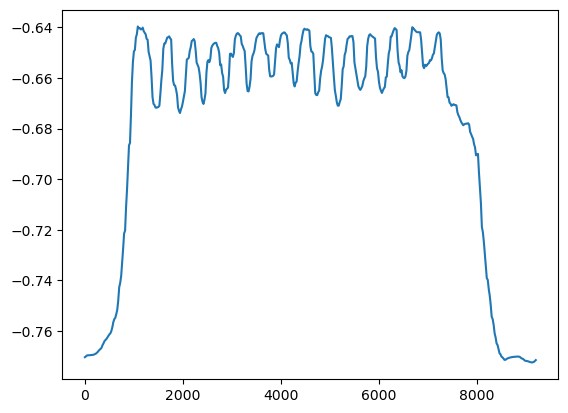

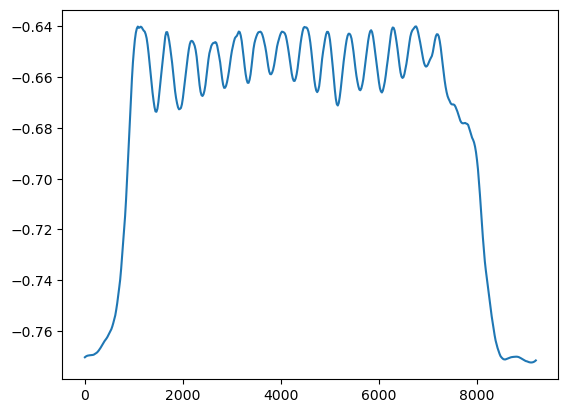

In [8]:
# obtain separate lists of the columns for the upper and lower body (face is included in upper body)
def smooth_data(sample):
    cols_upperbody = ['X_NOSE', 'Y_NOSE', 'Z_NOSE', 'X_LEFT_EYE_INNER', 'Y_LEFT_EYE_INNER', 'Z_LEFT_EYE_INNER', 'X_LEFT_EYE', 'Y_LEFT_EYE', 'Z_LEFT_EYE', 'X_LEFT_EYE_OUTER', 'Y_LEFT_EYE_OUTER', 'Z_LEFT_EYE_OUTER', 'X_RIGHT_EYE_OUTER', 'Y_RIGHT_EYE_OUTER', 'Z_RIGHT_EYE_OUTER', 'X_RIGHT_EYE', 'Y_RIGHT_EYE', 'Z_RIGHT_EYE', 'X_RIGHT_EYE_OUTER.1', 'Y_RIGHT_EYE_OUTER.1', 'Z_RIGHT_EYE_OUTER.1', 'X_LEFT_EAR', 'Y_LEFT_EAR', 'Z_LEFT_EAR', 'X_RIGHT_EAR', 'Y_RIGHT_EAR', 'Z_RIGHT_EAR', 'X_MOUTH_LEFT', 'Y_MOUTH_LEFT', 'Z_MOUTH_LEFT', 'X_MOUTH_RIGHT', 'Y_MOUTH_RIGHT', 'Z_MOUTH_RIGHT', 'X_LEFT_SHOULDER', 'Y_LEFT_SHOULDER', 'Z_LEFT_SHOULDER', 'X_RIGHT_SHOULDER', 'Y_RIGHT_SHOULDER', 'Z_RIGHT_SHOULDER', 'X_LEFT_ELBOW', 'Y_LEFT_ELBOW', 'Z_LEFT_ELBOW', 'X_RIGHT_ELBOW', 'Y_RIGHT_ELBOW', 'Z_RIGHT_ELBOW', 'X_LEFT_WRIST', 'Y_LEFT_WRIST', 'Z_LEFT_WRIST', 'X_RIGHT_WRIST', 'Y_RIGHT_WRIST', 'Z_RIGHT_WRIST', 'X_LEFT_PINKY', 'Y_LEFT_PINKY', 'Z_LEFT_PINKY', 'X_RIGHT_PINKY', 'Y_RIGHT_PINKY', 'Z_RIGHT_PINKY', 'X_LEFT_INDEX', 'Y_LEFT_INDEX', 'Z_LEFT_INDEX', 'X_RIGHT_INDEX', 'Y_RIGHT_INDEX', 'Z_RIGHT_INDEX', 'X_LEFT_THUMB', 'Y_LEFT_THUMB', 'Z_LEFT_THUMB', 'X_RIGHT_THUMB', 'Y_RIGHT_THUMB']
    cols_lowerbody = ['X_LEFT_HIP',
       'Y_LEFT_HIP', 'Z_LEFT_HIP', 'X_RIGHT_HIP', 'Y_RIGHT_HIP', 'Z_RIGHT_HIP',
       'X_LEFT_KNEE', 'Y_LEFT_KNEE', 'Z_LEFT_KNEE', 'X_RIGHT_KNEE',
       'Y_RIGHT_KNEE', 'Z_RIGHT_KNEE', 'X_LEFT_ANKLE', 'Y_LEFT_ANKLE',
       'Z_LEFT_ANKLE', 'X_RIGHT_ANKLE', 'Y_RIGHT_ANKLE', 'Z_RIGHT_ANKLE',
       'X_LEFT_HEEL', 'Y_LEFT_HEEL', 'Z_LEFT_HEEL', 'X_RIGHT_HEEL',
       'Y_RIGHT_HEEL', 'Z_RIGHT_HEEL', 'X_LEFT_FOOT_INDEX',
       'Y_LEFT_FOOT_INDEX', 'Z_LEFT_FOOT_INDEX', 'X_RIGHT_FOOT_INDEX',
       'Y_RIGHT_FOOT_INDEX', 'Z_RIGHT_FOOT_INDEX']

# smooth upperbody and face with savgol 20,4
    for col in cols_upperbody:
        sample[col] = scipy.signal.savgol_filter(sample[col], 20, 4)

# smooth lowerbod with savgol 30,3
    for col in cols_lowerbody:  
        sample[col] = scipy.signal.savgol_filter(sample[col], 10, 1)
    return(sample)


plt.plot(sample['time'], sample['Y_LEFT_WRIST'])
plt.show()

sample = smooth_data(sample)

# plot the smoothed data
plt.plot(sample['time'], sample['Y_LEFT_WRIST'])
plt.show()

## TODO: normalize by length of people (from neck to heel)

# from the first frame (row), we calculate the distance between mid-shoulder and mid-heel and save it dictionary
# normalize all coordinates by this distance


In [ ]:
# loop over files

# sanity check if it works - PLOT OF 3D KEYPOINTS

In [ ]:
# TODO
## plot all the keypoints in 3d space



# import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# 3D tracking checking
fileexample = sample
#fileexample_hands = sample_h
#print('Well be looking at the following file: ' + fileexample)

MT_tracking = sample
#MT_tracking_hands = sample_h

# Create a figure and axis
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Define the number of frames
num_frames = len(MT_tracking)

# Define the scatter plot
scatter = ax.scatter([], [], [], marker='o')
#scatter2 = ax.scatter([], [], [], marker='o')

# Update function for animation
def update(frame):
    ax.clear()
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_title('3D Animation')
    
    # Set the limits of the axes based on the maximum values
    ax.set_xlim3d(0, 1)
    ax.set_ylim3d(20, 0)
    ax.set_zlim3d(0, 1) #we need to flip the vertical
    
    # Plot the data for the current frame
    frame_data = MT_tracking.iloc[frame]
    frame_data_hands = MT_tracking.iloc[frame]
    x = frame_data.filter(like='X_')
    x_hands = frame_data_hands.filter(like='X_')
    y = frame_data.filter(like='Z_')
    y_hands = frame_data_hands.filter(like='Z_')
    z = frame_data.filter(like='Y_')
    z_hands = frame_data_hands.filter(like='Y_')
    # create scatter that has body in blue, and hands in red
    #scatter = ax.scatter(x, y, z, color='blue')
    scatter = ax.scatter(x_hands, y_hands, z_hands, color='red')

    return scatter

# Create the animation
ani = FuncAnimation(fig, update, frames=num_frames, interval=1000/25)

# display the animation
ani.save('3d_animation.mp4', writer='ffmpeg')

# Derive Speed and Smooth

/var/folders/_w/lg28lz4167jg30x0sng46nx40000gn/T/ipykernel_1123/3052332455.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sample[col + '_speed'] = np.insert(np.sqrt(np.diff(x) ** 2 + np.diff(y) ** 2 + np.diff(z) ** 2), 0, 0)
/var/folders/_w/lg28lz4167jg30x0sng46nx40000gn/T/ipykernel_1123/3052332455.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sample[col + '_speed'] = np.insert(np.sqrt(np.diff(x) ** 2 + np.diff(y) ** 2 + np.diff(z) ** 2), 0, 0)
/var/folders/_w/lg28lz4167jg30x0sng46nx40000gn/T/ipykernel_1123/30523324

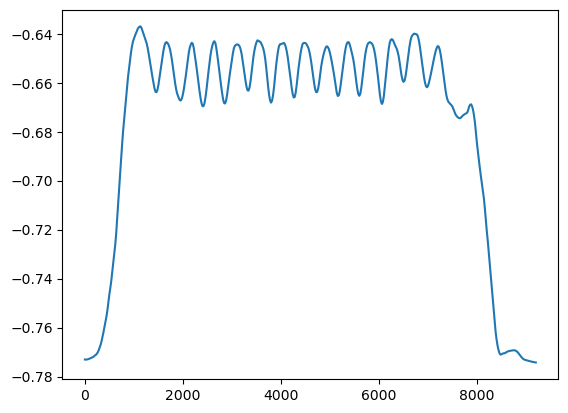

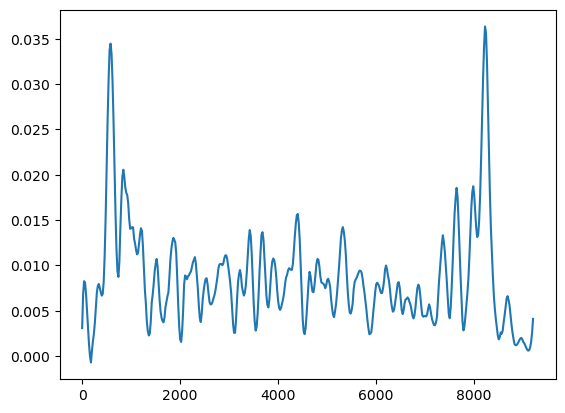

In [9]:
# in cols, get rid of Y_. X_, Z_
def derive_speed_smooth(cols, sample):
    speedcols = [col.replace('Y_', '') for col in cols]
    speedcols = [col.replace('X_', '') for col in speedcols]
    speedcols = [col.replace('Z_', '') for col in speedcols]

# keep only unique values
    speedcols = list(set(speedcols))

    for col in speedcols:
        x = sample['X_' + col]
        y = sample['Y_' + col]
        z = sample['Z_' + col]

    # calculate speed
        sample[col + '_speed'] = np.insert(np.sqrt(np.diff(x) ** 2 + np.diff(y) ** 2 + np.diff(z) ** 2), 0, 0)
        # FLAGGED: multiply by sr to get to cm/s
        #  sr = 1/np.mean(np.diff(mt['Time']))
    # smooth speed
    for col in speedcols:
        sample[col + '_speed'] = scipy.signal.savgol_filter(sample[col + '_speed'], 20, 4)
    # OR
    #sample[col + '_speed'] = scipy.signal.savgol_filter(sample[col + '_speed'], 30, 3)
    return(speedcols, sample)


speedcols, sample = derive_speed_smooth(cols, sample)

# plot RIGHT_WRIST_speed
plt.plot(sample['time'], sample['Y_RIGHT_WRIST'])
plt.show()
plt.plot(sample['time'], sample['RIGHT_WRIST_speed'])
plt.show()

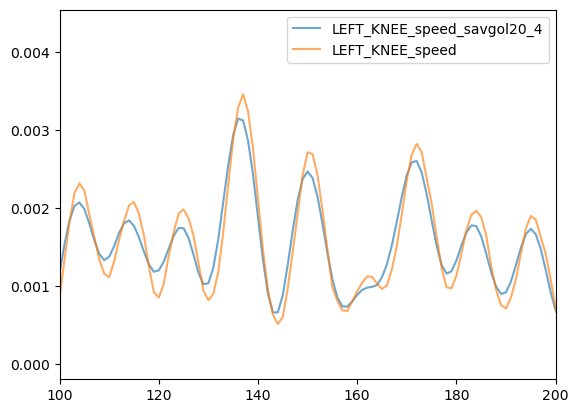

In [10]:
# test smoothing parameters for speed

import scipy
import matplotlib.pyplot as plt
x = 'LEFT_KNEE_speed'


# list possible window
window = [20]
# list possible orders
order = [4]

# col of interest
samplecol = [x]

# iterate over handcols and apply all possible combinations of window and order, save it to new df
# prepare new df
df_smooth = pd.DataFrame()

for col in samplecol:
    for win in window:
        for ord in order:
            df_smooth[col + '_savgol' + str(win) + '_' + str(ord)] = scipy.signal.savgol_filter(sample[col], win, ord)


# make R_Hand_x from df_sample a list
LKnee_x = sample[x].tolist()
#LKnee_y = sample[y].tolist()
#LKnee_z = sample[z].tolist()


# load these values into df_smooth as a new column
df_smooth[x] = LKnee_x
##df_smooth[y] = LKnee_y
#df_smooth[z] = LKnee_z

#plot all R_Hand_x columns in one plot
colstoplot = [col for col in df_smooth.columns if x in col]
for col in colstoplot:
    plt.plot(df_smooth[col], label=col, alpha=0.65)
plt.legend()
# make only timewindow 50 to 250
plt.xlim(100, 200)
plt.show()

# Derive vertical velocity and smooth

/var/folders/_w/lg28lz4167jg30x0sng46nx40000gn/T/ipykernel_1123/3782277826.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sample[col + '_velocity'] = np.insert(np.diff(sample[col]), 0, 0)
/var/folders/_w/lg28lz4167jg30x0sng46nx40000gn/T/ipykernel_1123/3782277826.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sample[col + '_velocity'] = np.insert(np.diff(sample[col]), 0, 0)
/var/folders/_w/lg28lz4167jg30x0sng46nx40000gn/T/ipykernel_1123/3782277826.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

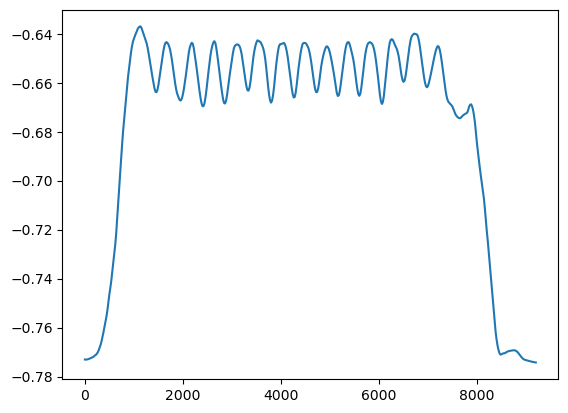

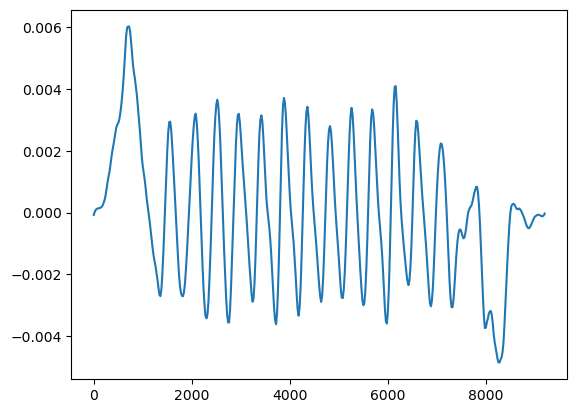

In [11]:
# Get a list of the columns that contain Y_
def derive_vertical_vel_smooth(sample):
    verticalcols = [col for col in sample.columns if 'Y_' in col]
    verticalcols = [col for col in verticalcols if 'speed' not in col] 

# calculate the velocity
    for col in verticalcols:
        sample[col + '_velocity'] = np.insert(np.diff(sample[col]), 0, 0)  
    vel_cols = [col for col in sample.columns if "_velocity" in col]
    for col in vel_cols:
        sample[col] = scipy.signal.savgol_filter(sample[col], 20, 4)
    return verticalcols, sample

verticalcols, sample = derive_vertical_vel_smooth(sample)

plt.plot(sample['time'], sample['Y_RIGHT_WRIST'])
plt.show()
plt.plot(sample['time'], sample['Y_RIGHT_WRIST_velocity'])
plt.show()

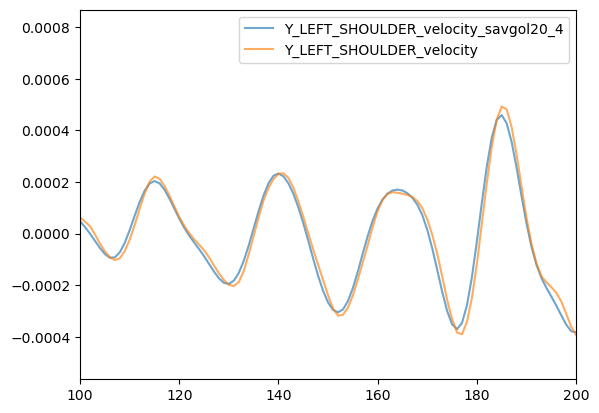

In [12]:
# test possible smoothing windows

import scipy
import matplotlib.pyplot as plt
x = 'Y_LEFT_SHOULDER_velocity'


# list possible window
window = [20]
# list possible orders
order = [4]

# col of interest
samplecol = [x]

# iterate over handcols and apply all possible combinations of window and order, save it to new df
# prepare new df
df_smooth = pd.DataFrame()

for col in samplecol:
    for win in window:
        for ord in order:
            df_smooth[col + '_savgol' + str(win) + '_' + str(ord)] = scipy.signal.savgol_filter(sample[col], win, ord)


# make R_Hand_x from df_sample a list
LKnee_x = sample[x].tolist()
#LKnee_y = sample[y].tolist()
#LKnee_z = sample[z].tolist()


# load these values into df_smooth as a new column
df_smooth[x] = LKnee_x
##df_smooth[y] = LKnee_y
#df_smooth[z] = LKnee_z

#plot all R_Hand_x columns in one plot
colstoplot = [col for col in df_smooth.columns if x in col]
for col in colstoplot:
    plt.plot(df_smooth[col], label=col, alpha=0.65)
plt.legend()
# make only timewindow 50 to 250
plt.xlim(100, 200)
plt.show()

# Derive Acceleration and Smooth

/var/folders/_w/lg28lz4167jg30x0sng46nx40000gn/T/ipykernel_1123/1042381327.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sample[col + '_acceleration'] = np.insert(np.diff(sample[col + "_velocity"]), 0, 0)
/var/folders/_w/lg28lz4167jg30x0sng46nx40000gn/T/ipykernel_1123/1042381327.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sample[col + '_acceleration'] = np.insert(np.diff(sample[col + "_velocity"]), 0, 0)
/var/folders/_w/lg28lz4167jg30x0sng46nx40000gn/T/ipykernel_1123/1042381327.py:4: PerformanceWarning: DataFrame i

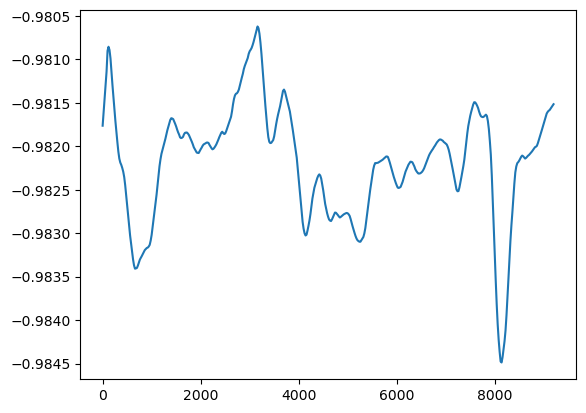

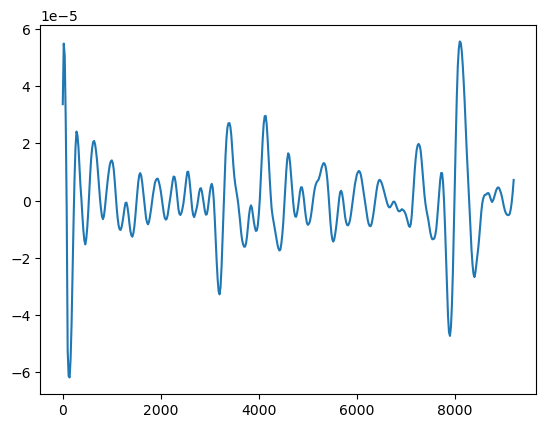

In [13]:
# calculate the acceleration
def derive_accel_smooth(verticalcols, sample):
    for col in verticalcols:
        sample[col + '_acceleration'] = np.insert(np.diff(sample[col + "_velocity"]), 0, 0) 
    accel_cols = [col for col in sample.columns if "_acceleration" in col]
    for col in accel_cols:
        sample[col] = scipy.signal.savgol_filter(sample[col], 10, 3)
    return (sample)

sample = derive_accel_smooth(verticalcols, sample)

plt.plot(sample['time'], sample['Y_LEFT_HEEL'])
plt.show()
plt.plot(sample['time'], sample['Y_LEFT_HEEL_acceleration'])
plt.show()
    

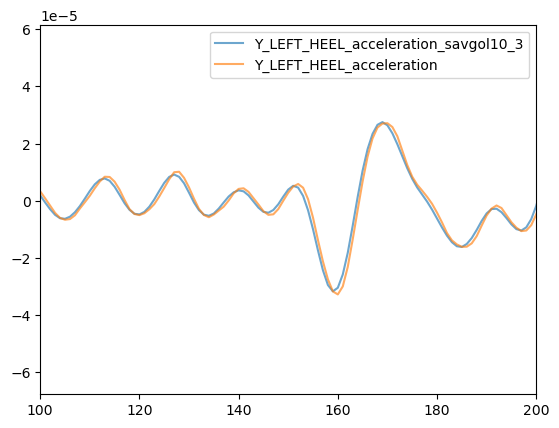

In [14]:
# test possible smoothing windows

import scipy
import matplotlib.pyplot as plt
x = 'Y_LEFT_HEEL_acceleration'


# list possible window
window = [10]
# list possible orders
order = [3]

# col of interest
samplecol = [x]

# iterate over handcols and apply all possible combinations of window and order, save it to new df
# prepare new df
df_smooth = pd.DataFrame()

for col in samplecol:
    for win in window:
        for ord in order:
            df_smooth[col + '_savgol' + str(win) + '_' + str(ord)] = scipy.signal.savgol_filter(sample[col], win, ord)


# make R_Hand_x from df_sample a list
LKnee_x = sample[x].tolist()
#LKnee_y = sample[y].tolist()
#LKnee_z = sample[z].tolist()


# load these values into df_smooth as a new column
df_smooth[x] = LKnee_x
##df_smooth[y] = LKnee_y
#df_smooth[z] = LKnee_z

#plot all R_Hand_x columns in one plot
colstoplot = [col for col in df_smooth.columns if x in col]
for col in colstoplot:
    plt.plot(df_smooth[col], label=col, alpha=0.65)
plt.legend()
# make only timewindow 50 to 250
plt.xlim(100, 200)
plt.show()

# Derive Jerk and Smooth

/var/folders/_w/lg28lz4167jg30x0sng46nx40000gn/T/ipykernel_1123/4173928743.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sample[col + '_jerk'] = np.insert(np.diff(sample[col + "_acceleration"]), 0, 0)
/var/folders/_w/lg28lz4167jg30x0sng46nx40000gn/T/ipykernel_1123/4173928743.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sample[col + '_jerk'] = np.insert(np.diff(sample[col + "_acceleration"]), 0, 0)
/var/folders/_w/lg28lz4167jg30x0sng46nx40000gn/T/ipykernel_1123/4173928743.py:5: PerformanceWarning: DataFrame is highly

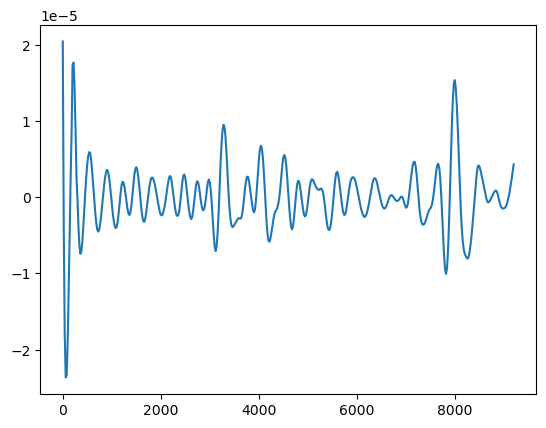

In [16]:
# derive jerk from acceleration 
def derive_jerk_smooth(verticalcols, sample):
    # calcuates the jerk for each vertical column
    for col in verticalcols:
        sample[col + '_jerk'] = np.insert(np.diff(sample[col + "_acceleration"]), 0, 0)
    # gets a list of all jerk columns
    jerk_cols = [col for col in sample.columns if "_jerk" in col]
    # smooths all jerk columns
    for col in jerk_cols:
        sample[col] = scipy.signal.savgol_filter(sample[col], 20, 4)
    return (sample)

sample = derive_jerk_smooth(verticalcols, sample)
plt.plot(sample['time'], sample['Y_LEFT_HEEL_jerk'])
plt.show()


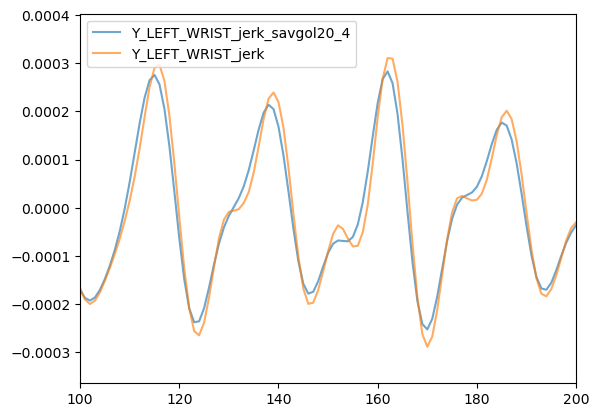

In [17]:
# test possible smoothing windows

import scipy
import matplotlib.pyplot as plt
x = 'Y_LEFT_WRIST_jerk'


# list possible window
window = [20]
# list possible orders
order = [4]

# col of interest
samplecol = [x]

# iterate over handcols and apply all possible combinations of window and order, save it to new df
# prepare new df
df_smooth = pd.DataFrame()

for col in samplecol:
    for win in window:
        for ord in order:
            df_smooth[col + '_savgol' + str(win) + '_' + str(ord)] = scipy.signal.savgol_filter(sample[col], win, ord)


# make R_Hand_x from df_sample a list
LKnee_x = sample[x].tolist()
#LKnee_y = sample[y].tolist()
#LKnee_z = sample[z].tolist()


# load these values into df_smooth as a new column
df_smooth[x] = LKnee_x
##df_smooth[y] = LKnee_y
#df_smooth[z] = LKnee_z

#plot all R_Hand_x columns in one plot
colstoplot = [col for col in df_smooth.columns if x in col]
for col in colstoplot:
    plt.plot(df_smooth[col], label=col, alpha=0.65)
plt.legend()
# make only timewindow 50 to 250
plt.xlim(100, 200)
plt.show()

# Plotting all the derivations

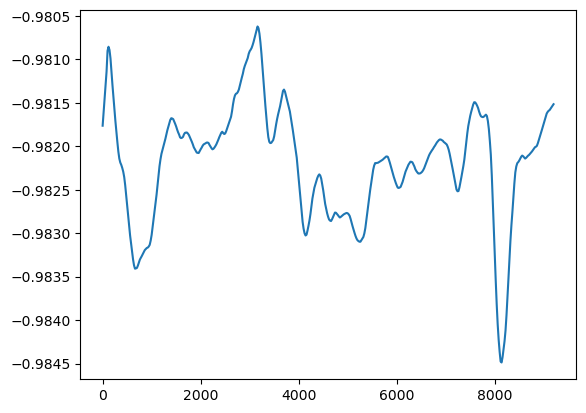

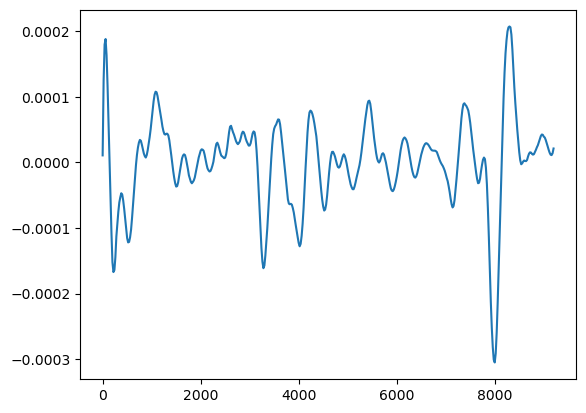

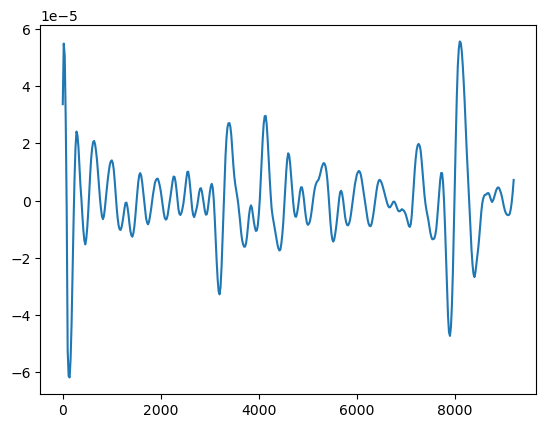

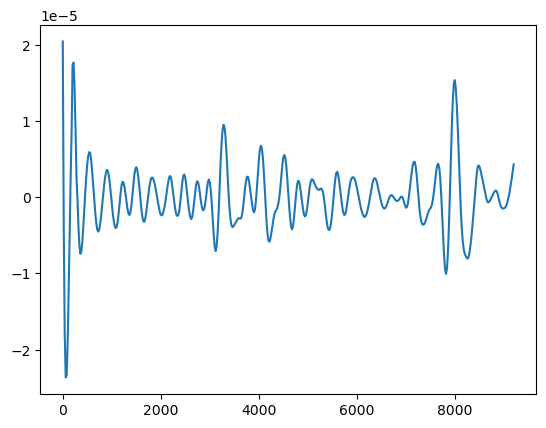

In [18]:

plt.plot(sample['time'], sample['Y_LEFT_HEEL'])
plt.show()
plt.plot(sample['time'], sample['Y_LEFT_HEEL_velocity'])
plt.show()
plt.plot(sample['time'], sample['Y_LEFT_HEEL_acceleration'])
plt.show()
plt.plot(sample['time'], sample['Y_LEFT_HEEL_jerk'])
plt.show()

# Final code to process every file in Output_TimeSeries

In [ ]:
# code to go through every file and recreate a csv with speed, velocity, accerlation, and jerk

import os
import glob
import pandas as pd
import numpy as np

#get the timeseries files
curfolder = os.getcwd()
print(curfolder)

mtfolder = curfolder + '/Output_TimeSeries/'
print(mtfolder)

processedfolder = curfolder + '/TS_processed/'
vidfolder = curfolder + '/Output_Videos/'

# get all the files in the folder
mtfiles = glob.glob(mtfolder + '*body.csv')
print(mtfiles)

vidfiles = glob.glob(vidfolder + '*.mp4')
print(vidfiles)

os.makedirs(processedfolder, exist_ok=True)

# for loop to go through every file in the timeseries folder
for file in mtfiles:
    # get the last part of the path in sample
    sample = clean_data(file)
    sample = flip_data(sample)
    cols, sample = interpolate(sample)
    sample = smooth_data(sample)
    # collect the dictionary of heights per person
    # save it mt_process

# get the mean height per person

# new loop over mt_process
    # normalize all cols by the height of the person
    # derive all
    # save it



    speedcols, sample = derive_speed_smooth(cols, sample)
    verticalcols, sample = derive_vertical_vel_smooth(sample)
    sample = derive_accel_smooth(verticalcols, sample)
    sample = derive_jerk_smooth(verticalcols, sample)
    fileID = sample['fileID'][0]
    globals()[fileID] = sample
    globals()[fileID].to_csv(os.path.join(processedfolder, f'{fileID}.csv'), index=False)


TODO
- get rid of all visibility columns
- interpolate missing data
- smooth the data - with plotting different options of the filter strength
- derive velocity  / speed & smooth
- derive acceleration & smooth
- derive jerk & smooth




Notes from July 16th gillian  
- I modified code from envisionbox to flip the Y axis so that it fits with the mediapipe data
- I smoothed the data using different Savitzky-Golay filters depending on the bodz part
- I smoothed the speed data (still want to ask which parameters seem best)
- I derived the vertical velocity from the vertical position data (check that this is correct)

Tomorrow I will start with smoothing the velosity data

In [ ]:
# ALIGN IT WITH ELAN ANNOTATIONS


# Function to parse elan file
def parse_eaf_file(eaf_file, rel_tiers):
    tree = ET.parse(eaf_file)
    root = tree.getroot()

    time_order = root.find('TIME_ORDER')
    time_slots = {time_slot.attrib['TIME_SLOT_ID']: time_slot.attrib['TIME_VALUE'] for time_slot in time_order}

    annotations = []
    relevant_tiers = {rel_tiers}

    for tier in root.findall('TIER'):
        tier_id = tier.attrib['TIER_ID']
        if tier_id in relevant_tiers:
            for annotation in tier.findall('ANNOTATION/ALIGNABLE_ANNOTATION'):
                # Ensure required attributes are present
                if 'TIME_SLOT_REF1' in annotation.attrib and 'TIME_SLOT_REF2' in annotation.attrib:
                    ts_ref1 = annotation.attrib['TIME_SLOT_REF1']
                    ts_ref2 = annotation.attrib['TIME_SLOT_REF2']
                    # Get annotation ID if it exists, otherwise set to None
                    ann_id = annotation.attrib.get('ANNOTATION_ID', None)
                    annotation_value = annotation.find('ANNOTATION_VALUE').text.strip()
                    annotations.append({
                        'tier_id': tier_id,
                        'annotation_id': ann_id,
                        'start_time': time_slots[ts_ref1],
                        'end_time': time_slots[ts_ref2],
                        'annotation_value': annotation_value
                    })

    return annotations

# Function to load annotations into csv
def fillAnno(TSfile, ANNOfile, colname):
    TSfile[colname] = None
    for row in ANNOfile.iterrows():
        start = row[0]
        end = row[1]
        TSfile.loc[(TSfile['time'] >= start) & (TSfile['time'] <= end), colname] = row[2]

CREATE TXT FILE FOR EACH TIER FROM ELAN

In [ ]:
################
#### arms ######
################

arms_anno = curfolder + '/annotations_groundTruth/arms_annotations.txt'

with open(arms_anno, 'w') as f:
    for file in annofiles_manu:
        print('working on ' + file)
        # get the filename as the last element
        filename = file.split('\\')[-1]
        # replace _ELAN_tiers.eaf with ''
        filename = filename.replace('_ELAN_tiers.eaf', '')
        # parse the file
        annotations = parse_eaf_file(file, 'arms')
        # write the annotations
        for annotation in annotations:
            f.write(f"{annotation['start_time']}\t{annotation['end_time']}\t{annotation['annotation_value']}\t{filename}\n")

###################
#### upper body####
###################

upperbody_anno = curfolder + '/annotations_groundTruth/upperbody_annotations.txt'

with open(upperbody_anno, 'w') as f:
    for file in annofiles_manu:
        print('working on ' + file)
        # get the filename as the last element
        filename = file.split('\\')[-1]
        # replace _ELAN_tiers.eaf with ''
        filename = filename.replace('_ELAN_tiers.eaf', '')
        # parse the file
        annotations = parse_eaf_file(file, 'upper_body')
        # write the annotations
        for annotation in annotations:
            f.write(f"{annotation['start_time']}\t{annotation['end_time']}\t{annotation['annotation_value']}\t{filename}\n")

###################
#### lower body####
###################

lowerbody_anno = curfolder + '/annotations_groundTruth/lowerbody_annotations.txt'

with open(lowerbody_anno, 'w') as f:
    for file in annofiles_manu:
        print('working on ' + file)
        # get the filename as the last element
        filename = file.split('\\')[-1]
        # replace _ELAN_tiers.eaf with ''
        filename = filename.replace('_ELAN_tiers.eaf', '')
        # parse the file
        annotations = parse_eaf_file(file, 'lower_body')
        # write the annotations
        for annotation in annotations:
            f.write(f"{annotation['start_time']}\t{annotation['end_time']}\t{annotation['annotation_value']}\t{filename}\n")

###################
##### head ########
###################

head_anno = curfolder + '/annotations_groundTruth/head_annotations.txt'

with open(head_anno, 'w') as f:
    for file in annofiles_manu:
        print('working on ' + file)
        # get the filename as the last element
        filename = file.split('\\')[-1]
        # replace _ELAN_tiers.eaf with ''
        filename = filename.replace('_ELAN_tiers.eaf', '')
        # parse the file
        annotations = parse_eaf_file(file, 'head_mov')
        # write the annotations
        for annotation in annotations:
            f.write(f"{annotation['start_time']}\t{annotation['end_time']}\t{annotation['annotation_value']}\t{filename}\n")


In [ ]:
ADD THE MOVEMENT ANNOTATION FROM TXTFILE TO THE DATAFRAME/CSV FILE THAT WE CREATED BY THE PROCESSING SCRIPT

In [ ]:
# These are the annotations per tier that we just created from manual annotations
arms_anno = curfolder + '/annotations_groundTruth/arms_annotations.txt'
upperbody_anno = curfolder + '/annotations_groundTruth/upperbody_annotations.txt'
lowerbody_anno = curfolder + '/annotations_groundTruth/lowerbody_annotations.txt'
head_anno = curfolder + '/annotations_groundTruth/head_annotations.txt'


for file in processedfiles:
    print('working on ' + file)

    # TrialID
    trialid = file.split('\\')[-1].split('.')[0]
    trialid = trialid.replace('merged_', '')

    # Load the merged file
    merged = pd.read_csv(file)
    
    # Load the annotations as df
    arms = pd.read_csv(arms_anno, sep='\t', header=None)
    ub = pd.read_csv(upperbody_anno, sep='\t', header=None)
    lb = pd.read_csv(lowerbody_anno, sep='\t', header=None)
    head = pd.read_csv(head_anno, sep='\t', header=None)

    annos = [arms, ub, lb, head]

    # Loop over each tier and fill values into timeseries
    for anno_df in annos:
        # Get the annotations for the trialid
        anno_trial = anno_df[anno_df[3] == trialid] 
        
        if anno_trial.empty:
            print('no annotations for ' + trialid)  # This will be the case of practice trials that were not annotated
            continue
        
        else:
            if anno_df.equals(arms):
                fillAnno(merged, anno_trial, 'arms')
            elif anno_df.equals(ub):
                fillAnno(merged, anno_trial, 'upper_body')
            elif anno_df.equals(lb):
                fillAnno(merged, anno_trial, 'lower_body')
            elif anno_df.equals(head):
                fillAnno(merged, anno_trial, 'head_mov')
            else:
                print('something went wrong')

    df = merged.copy()



    # YOU WILL END COLUMN FOR ARM THAT NAs where is no movement, and movement
    # for each cell where there is NA, or not movement, you fill it with movement
